<ipython-input-3-2519abe25ff5>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf]=df_table.mean()  #aykırı verileri ortlama ile doldurduk
<ipython-input-3-2519abe25ff5>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf]=alt_sinir #alt sınırın altında kalanları alt sınıra baskıladık


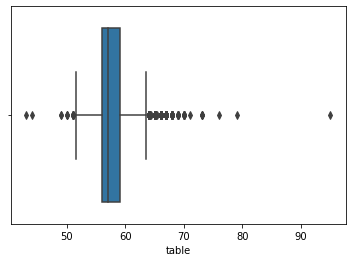

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 15 20:08:07 2020

@author: Onur
"""
#Tek Değişkenli Aykırı Gözlem

import seaborn as sns

df=sns.load_dataset('diamonds')   #seaborn kütüphanesinden bu datayı çekiyoruz
df=df.select_dtypes(include=['float64','int64'])  #sadece sayısal değişkenlere erişmek için tip seçimi
df=df.dropna()

df_table=df["table"]

sns.boxplot(df_table)  #kutu grafik oluştu. dışarda kalan noktalar aykırı veri

#eşik değerleri bulmalıyız

Q1=df_table.quantile(0.25)  #veriler k den b ye sıralandığında %25 ince indexi alıyor 
Q3=df_table.quantile(0.75)   #3.çeyrek değer

IQR=Q3-Q1  #inter quartar

alt_sinir=Q1-1.5*IQR   #eşik değeri buluyoruz bu bi formul
ust_sinir=Q3+1.5*IQR

#aykırı verilere ulaşıcaz

(df_table < alt_sinir) |( df_table > ust_sinir)

aykırı_tf=df_table < alt_sinir    #aykırı değerlerin true false değerini gösteriyor
df_table[aykırı_tf]  #hangi değerlerin aykırı olduğuna bakıyoruz

df_table[aykırı_tf].index  #Aykırı verilerin indexlerini bakıyoruz

#%%aykırı değer problemini çözmek

#1-silme yaklaşımı

import pandas as pd

df_table=pd.DataFrame(df_table)

t_df=df_table[~((df_table < alt_sinir)|(df_table > ust_sinir)).any(axis=1)]     #temiz df anlamında. ~ koymamızın sebebi koşulu sağlamayanları al anlamına geliyor
                                                              #any axis 1 in sebebi sütun bazında işlem yapmak
#%%2- ortalama ile doldurma

df=sns.load_dataset('diamonds')   
df=df.select_dtypes(include=['float64','int64'])  
df=df.dropna()

df_table=df["table"]

df_table[aykırı_tf]=df_table.mean()  #aykırı verileri ortlama ile doldurduk

#%% baskılama yöntemii

#aykırılar yakalandıktan sonra sınır değerlerine eşitlenir

df=sns.load_dataset('diamonds')   
df=df.select_dtypes(include=['float64','int64'])  
df=df.dropna()

df_table=df["table"]
df_table[aykırı_tf]=alt_sinir #alt sınırın altında kalanları alt sınıra baskıladık









In [1]:
1+1

2